# **Import library**

In [36]:
#Import library untuk KNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# **Latihan 1**

## **Import Dataset**

In [37]:
#Import dataset menggunakan link gdrive
df_latihan1 = pd.read_csv('https://drive.google.com/uc?export=download&id=1lNlsxJtBaLnVfLrg02an2dDZVyFuUY-B', sep=';')
df_latihan1

,temperatur_udara,kecepatan_angin,persepsi
0,10,0,Dingin
1,25,0,Panas
2,15,5,Dingin
3,20,3,Panas
4,18,7,Dingin
5,20,10,Dingin
6,22,5,Panas
7,24,6,Panas


In [38]:
#Melihat informasi dataset
df_latihan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   temperatur_udara  8 non-null      int64 
 1   kecepatan_angin   8 non-null      int64 
 2   persepsi          8 non-null      object
dtypes: int64(2), object(1)
memory usage: 324.0+ bytes


## **Encoding Data**

In [39]:
#Encode kategori ke numerik
replacements = {
    'persepsi': {'Dingin': 1, 'Panas': 0}
}
df_latihan1 = df_latihan1.replace(replacements)
df_latihan1

/tmp/ipython-input-3143139421.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_latihan1 = df_latihan1.replace(replacements)


,temperatur_udara,kecepatan_angin,persepsi
0,10,0,1
1,25,0,0
2,15,5,1
3,20,3,0
4,18,7,1
5,20,10,1
6,22,5,0
7,24,6,0


## **Separating Data**

In [40]:
#Memisahkan data menjadi fitur dan target
X = df_latihan1[['temperatur_udara', 'kecepatan_angin']]
y = df_latihan1['persepsi']

## **Splitting Data**

In [41]:
#Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## **Modeling**

In [42]:
#Melatih model KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
#Melakukan prediksi
y_pred1 = knn.predict(X_test)

#Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred1)
print("Akurasi:", accuracy)

Akurasi: 0.5


In [44]:
#Prediksi data testing (temperatur_udara 16°C, dan kecepatan_angin 3km/jam )
data_test = [[16, 3]]
prediction = knn.predict(data_test)

print("Prediksi:", prediction)

Prediksi: [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [45]:
#Mencari nilai k terbaik
best_k = 1
best_accuracy = 0
results = []

# max_k harus didasarkan pada jumlah sampel di X_train
max_k = len(X_train)

for k in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred1 = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred1)

    results.append((k, acc))
    print(f"k={k}, accuracy={acc}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

print(f"\nNilai k terbaik: {best_k}")
print(f"Akurasi terbaik: {best_accuracy}")

k=1, accuracy=1.0
k=2, accuracy=0.5
k=3, accuracy=0.5
k=4, accuracy=0.5
k=5, accuracy=0.5
k=6, accuracy=0.5

Nilai k terbaik: 1
Akurasi terbaik: 1.0


# **Latihan 2**

## **Import Dataset**

In [46]:
#Import dataset menggunakan link gdrive
df_latihan2 = pd.read_csv('https://drive.google.com/uc?export=download&id=1XCBgaSeSCaHKcwja7FVOFIlW4VOBCCU5', sep=';')
df_latihan2

,nim,hasil_sebenarnya,hasil_prediksi
0,T1001,Lulus,Lulus
1,T1002,Lulus,Lulus
2,T1003,Lulus,Lulus
3,T1004,Lulus,Tidak Lulus
4,T1005,Lulus,Tidak Lulus
5,T1006,Tidak Lulus,Lulus
6,T1007,Tidak Lulus,Tidak Lulus
7,T1008,Tidak Lulus,Tidak Lulus
8,T1009,Tidak Lulus,Tidak Lulus
9,T1010,Tidak Lulus,Tidak Lulus


## **Tabel Confusion Matrix**

In [47]:
#Confusion matrix berdasarkan tabel di atas
y_true = df_latihan2['hasil_sebenarnya']
y_pred = df_latihan2['hasil_prediksi']

cm = confusion_matrix(y_true, y_pred, labels=['Lulus','Tidak Lulus'])
cm

array([[3, 2],
       [1, 4]])

In [48]:
#Tampilan confusion matrix dalam format tabel
cm_df = pd.DataFrame(cm,
                     index=['True Lulus','True Tidak Lulus'],
                     columns=['Pred Lulus','Pred Tidak Lulus'])
cm_df

,Pred Lulus,Pred Tidak Lulus
True Lulus,3,2
True Tidak Lulus,1,4


## **Nilai Persentase: Accuracy - Precission - Recall**

In [49]:
#Melihat nilai accuracy, precission, dan recall
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label='Lulus')
recall = recall_score(y_true, y_pred, pos_label='Lulus')

print("Akurasi    :", round(accuracy, 2))
print("Precision  :", round(precision, 2))
print("Recall     :", round(recall, 2))

Akurasi    : 0.7
Precision  : 0.75
Recall     : 0.6


# **Latihan 3**

## **Import Dataset**

In [50]:
#Import dataset menggunakan link gdrive
df_latihan3 = pd.read_csv('https://drive.google.com/uc?export=download&id=1YlgK3OzZc8BQn-yAk8WnXoowJKmyAEeN')
df_latihan3

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [51]:
#Melihat informasi dataset
df_latihan3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


## **Data Cleaning**

In [52]:
#Melihat missing value
df_latihan3.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [53]:
#Melihat nilai unik
print(df_latihan3['Cloud Cover'].unique())
print(df_latihan3['Season'].unique())
print(df_latihan3['Location'].unique())
print(df_latihan3['Weather Type'].unique())

['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']
['inland' 'mountain' 'coastal']
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [54]:
#Mengubah kolom kategori menjadi numerik
kategori_cols = ['Cloud Cover', 'Season', 'Location', 'Weather Type']

le = LabelEncoder()

for col in kategori_cols:
    df_latihan3[col] = le.fit_transform(df_latihan3[col])

df_latihan3.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


## **Visualisasi Korelasi**

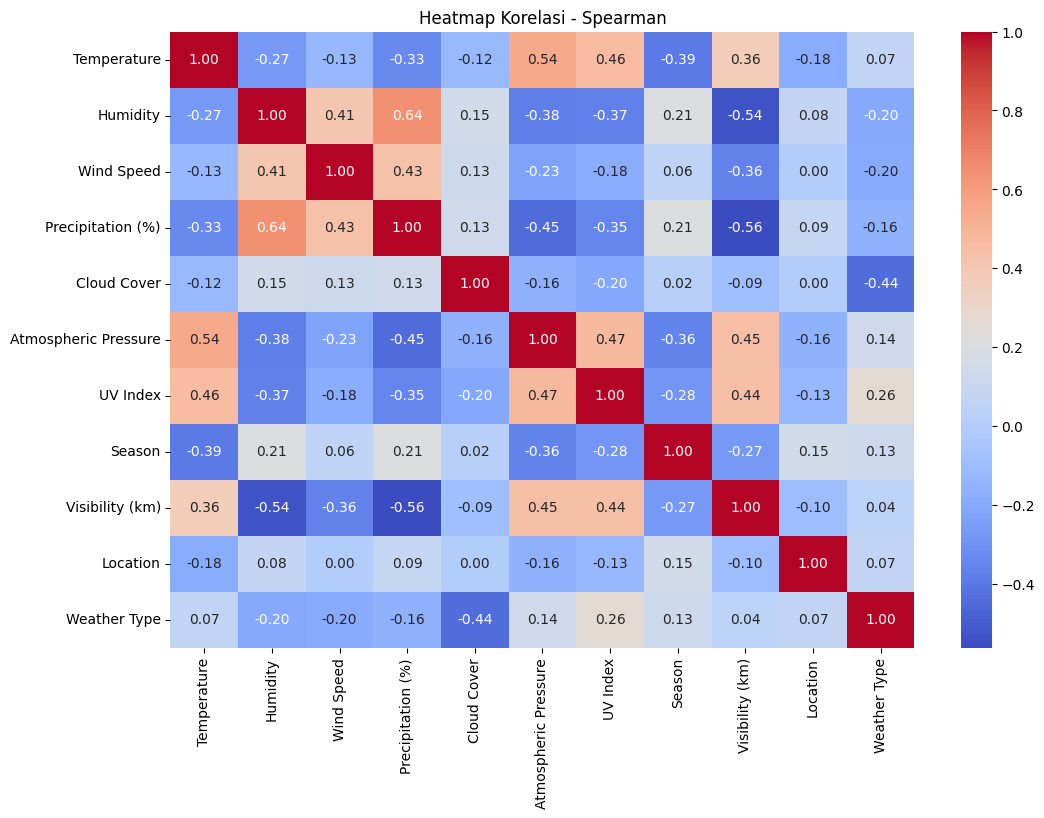

In [55]:
#Menghitung matriks korelasi menggunakan spearman
correlation_matrix = df_latihan3.corr(method='spearman')

#Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap Korelasi - Spearman')
plt.show()

## **Separating Dataset**

In [56]:
#Menentukan fitur dan target
x = df_latihan3.drop('Weather Type', axis=1)
y = df_latihan3['Weather Type']

In [57]:
#Menampilkan 5 baris teratas kolom fitur
x.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2


In [58]:
#Menampilkan 5 baris kolom target
y.head()

,Weather Type
0,1
1,0
2,3
3,3
4,1


## **Splitting Dataset**

In [75]:
#Dataset menjadi data train dan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Standarisasi Dataset**

In [60]:
#Standarisasi fitur data latih dan testing
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## **Modeling**

In [61]:
#Melihat dimensi data latih dan testing
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(10560, 10) (10560,) (2640, 10) (2640,)


In [62]:
#Training model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
#Melakukan Prediksi
y_pred = model.predict(x_test_scaled)

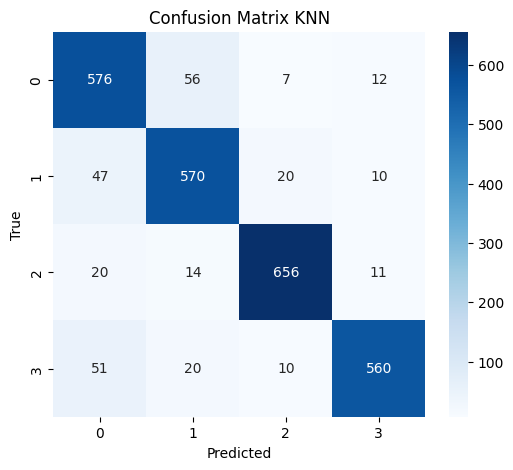

In [65]:
#Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix KNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [73]:
#Mencari parameter terbaik untuk digunakan
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score (CV):", grid.best_score_)

Best Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Score (CV): 0.8958333333333334


In [79]:
#Melatih model
best_knn = grid.best_estimator_
best_knn.fit(x_train_scaled, y_train)

#Melakukan Prediksi
y_pred = best_knn.predict(x_test_scaled)

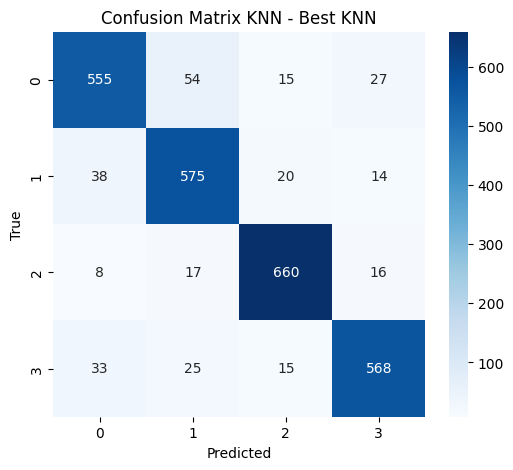

In [86]:
#Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix KNN - Best KNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [83]:
#Evaluasi model dan classification report
print("\n Clasification Report")
print(classification_report(y_test, y_pred))


 Clasification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       651
           1       0.86      0.89      0.87       647
           2       0.93      0.94      0.94       701
           3       0.91      0.89      0.90       641

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640



In [84]:
#Validasi dengan cross validation
scores = cross_val_score(best_knn, x_train, y_train, cv=5)
print("Cross Validation Accuracy: ", scores.mean())
print("Std Dev: ", scores.std())

Cross Validation Accuracy:  0.8958333333333334
Std Dev:  0.005497320179431824


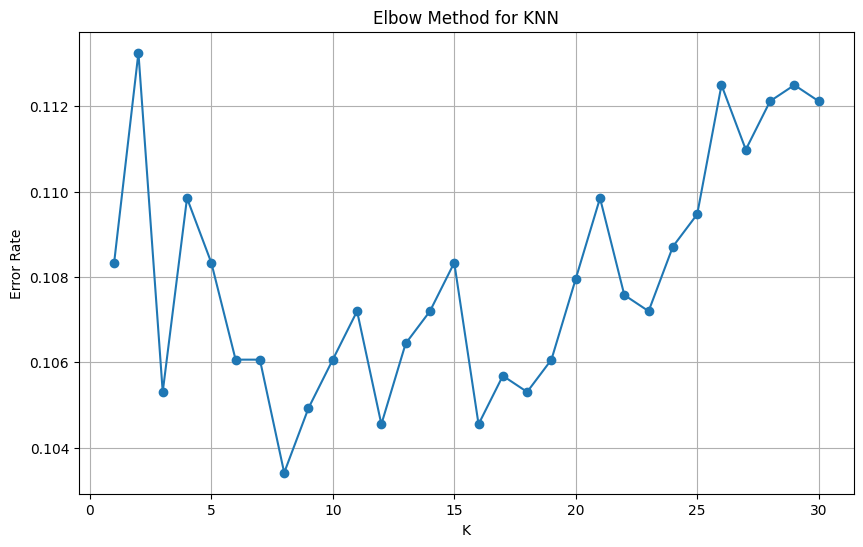

In [85]:
#Menentukan Nilai K Optimal dengan Elbow Method
errors = []

for k in range(1, 31):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(x_train_scaled, y_train)
    pred = knn_temp.predict(x_test_scaled)
    errors.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, 31), errors, marker='o')
plt.title("Elbow Method for KNN")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()